In [1]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover, resample_apply
import pandas_ta as pta
import pandas as pd

In [2]:
def load_ticker_data(path2data: str):
    data = pd.read_csv(path2data)
    data = data[['begin', 'open', 'high', 'low', 'close', 'volume']]
    data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

In [17]:
data = load_ticker_data('data/d1/SBER.csv')
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-11,86.56,88.17,85.51,86.69,149200144.0
2010-01-12,86.55,86.77,84.90,85.00,130321911.0
2010-01-13,84.30,87.23,84.10,86.61,128818253.0
2010-01-14,87.50,87.87,86.75,87.55,111469807.0
2010-01-15,87.50,88.67,87.16,88.15,142265882.0


In [18]:
def ma(price, period=21):
    return pta.sma(price, period).to_numpy()

In [19]:
class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 21
    n2 = 252
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(ma, self.data.Close.s, self.n1)
        self.sma2 = self.I(ma, self.data.Close.s, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

In [20]:
bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
stats = bt.run()
print(stats)

Start                     2010-01-11 00:00:00
End                       2023-12-06 00:00:00
Duration                   5077 days 00:00:00
Exposure Time [%]                   88.586177
Equity Final [$]                  14397.43576
Equity Peak [$]                   14750.86576
Return [%]                          43.974358
Buy & Hold Return [%]               209.23982
Return (Ann.) [%]                    2.668926
Volatility (Ann.) [%]               28.455693
Sharpe Ratio                         0.093792
Sortino Ratio                        0.144266
Calmar Ratio                         0.039527
Max. Drawdown [%]                  -67.521995
Avg. Drawdown [%]                  -12.093506
Max. Drawdown Duration     2311 days 00:00:00
Avg. Drawdown Duration      320 days 00:00:00
# Trades                                   24
Win Rate [%]                             25.0
Best Trade [%]                       90.81201
Worst Trade [%]                    -24.372456
Avg. Trade [%]                    

In [21]:
import os

In [41]:
processed_tickers = []
tickers_stats = []
tickers = os.listdir('data/d1/')
for ticker in tickers:
    try:
        data = load_ticker_data(f'data/d1/{ticker}')
        bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
        stats = bt.run()
        tickers_stats.append(stats)
        processed_tickers.append(ticker)
    except Exception as e:
        print(ticker)
        print(e)

ELFV.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some

GAZS.csv
Indicator "ma(C,21)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some

EUTR.csv
Indicator "ma(C,21)" errored with exception: 'NoneType' object has no attribute 'to_numpy'
ASTR.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'
UGLD.csv
Indicator "ma(C,21)" errored with exception: 'NoneType' object has no attribute 'to_numpy'
GECO.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some

CARM.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'
HNFG.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'
GAZT.csv
Indicator "ma(C,21)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)


GAZC.csv
Indicator "ma(C,21)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)


SOFL.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)


WUSH.csv
Indicator "ma(C,252)" errored with exception: 'NoneType' object has no attribute 'to_numpy'


/tmp/ipykernel_19493/2126137720.py:7: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)


In [36]:
returns = [s['Return [%]'] for s in tickers_stats]
drawdown = [s['Max. Drawdown [%]'] for s in tickers_stats]

In [33]:
import matplotlib.pyplot as plt

<Axes: >

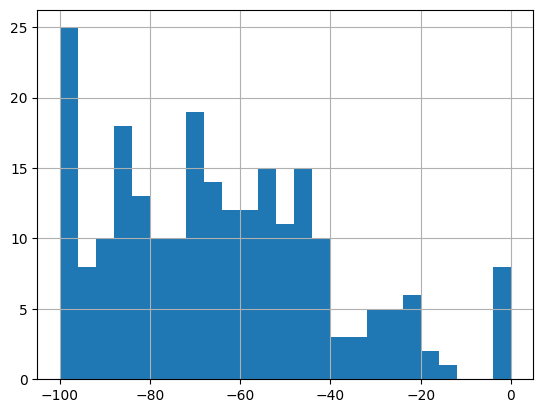

In [37]:
pd.Series(drawdown).hist(bins=25)

In [42]:
tickers_stats = pd.DataFrame(tickers_stats)
tickers_stats['ticker'] = processed_tickers
tickers_stats.head()

,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],Volatility (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy,_equity_curve,_trades,ticker
0,2014-06-09,2023-12-06,3467 days,83.851976,19536.090700,19650.4907,95.360907,477.323395,7.354555,29.194693,...,6.467166,572 days,265 days,2.481104,11.208505,0.739099,SmaCross,Equity DrawdownPct DrawdownDu...,Size EntryBar ExitBar EntryPrice ExitP...,SIBN.csv
1,2020-10-29,2023-12-06,1133 days,54.687500,13751.683000,14488.1830,37.516830,299.422875,11.019180,28.592388,...,21.314387,357 days,302 days,51.041084,23.817149,0.961999,SmaCross,Equity DrawdownPct DrawdownDur...,Size EntryBar ExitBar EntryPrice ExitPr...,SMLT.csv
2,2014-07-15,2023-12-06,3431 days,81.686430,901.118400,11983.3660,-90.988816,970.769231,-32.936606,91.617617,...,-14.244639,503 days,135 days,0.700588,-5.390019,-2.440929,SmaCross,Equity DrawdownPct DrawdownDu...,Size EntryBar ExitBar EntryPrice ExitP...,VRSBP.csv
3,2014-06-09,2023-12-06,3467 days,72.074034,4405.258000,12627.7580,-55.947420,250.892857,-10.636551,62.547187,...,-5.076563,783 days,147 days,0.989138,-0.115806,-1.289288,SmaCross,Equity DrawdownPct DrawdownDur...,Size EntryBar ExitBar EntryPrice ExitP...,KBSB.csv
4,2014-06-09,2023-12-06,3467 days,80.062305,1276.980451,10000.0000,-87.230195,990.000000,-20.611247,49.736890,...,-6.229497,431 days,85 days,0.937940,-0.638581,-1.943762,SmaCross,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,SARE.csv
